In [1]:
import torch
import torchvision 
import torchvision.datasets as datasets
import torchvision.transforms as T
import numpy as np
from torch_geometric.data import InMemoryDataset, Data
from torch_geometric.loader import DataLoader

import matplotlib.pyplot as plt
import skimage as ski

Available datasets:

RGB color:
+ CIFAR10  (cifar10_slic)
+ CIFAR100 (cifar100_slic)
+ STL10  (stl10_slic)
+ StanfordCars (stanfordcars_slic)

Grayscale:
+ MNIST (mnist_slic)
+ FashionMNIST (fashion_mnist_slic)

In [1]:
import cifar10_slic

In [2]:

test_ds  = cifar10_slic.SuperPixelGraphCIFAR10(root=None, 
                                                n_segments=75,
                                                compactness=0.1,
                                                features=None,
                                                graph_type='8NNFeature',
                                                slic_method='SLIC0',
                                                train=False,
                                                pre_select_features=False)

Selected features for 8NNFeature graph:
	+ avg_color
	+ std_deviation_color
	+ centroid
	+ std_deviation_centroid


Processing...


Files already downloaded and verified
Loading 10000 images with n_segments = 75 ...
Computing features: 
Done in 41.6432249546051s
CIFAR10 Loaded.
Average number of nodes: 115.6446 with standard deviation 0.9644121732952151
Average number of edges: 1850.3136 with standard deviation 15.430594772723442


Done!


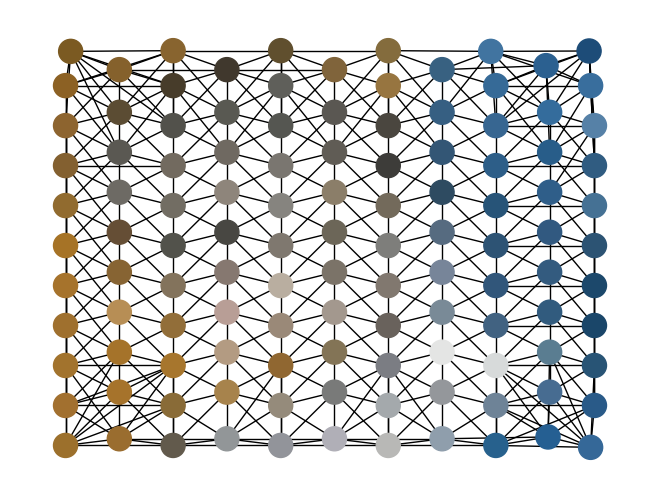

In [18]:
import networkx as nx
from torch_geometric.utils import to_networkx

g = test_ds[0]
pos = g.pos.numpy()
features = g.x.numpy()

nx_g = to_networkx(g, to_undirected=True)
nx_color = features[:,0:3]
nx_pos = dict(zip(range(g.num_nodes), pos))
nx.draw(nx_g, pos=nx_pos, node_color=nx_color)


Feature building

In [2]:
from compute_features import color_features, grayscale_features
import networkx as nx
from torch_geometric.utils import to_networkx

Requuired pre-processing for grayscale

In [3]:

ds = datasets.MNIST(root="mnist/test", train=False, download=True, transform=T.ToTensor())

In [6]:
img, y = ds[67]
_, dim0, dim1 = img.shape
img_np = img.view(dim0, dim1).numpy()
n_segments = 75
compactness = 0.1
features, edge_index, s = grayscale_features(img_np, n_segments, 1, 0)
print(features.shape, edge_index.shape, s.shape)

(80, 7) (2, 160) (28, 28)


Segmentation result

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


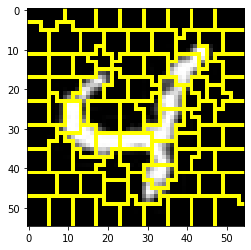

In [27]:
plt.imshow(ski.segmentation.mark_boundaries(img_np, s, mode='subpixel'))

Graph

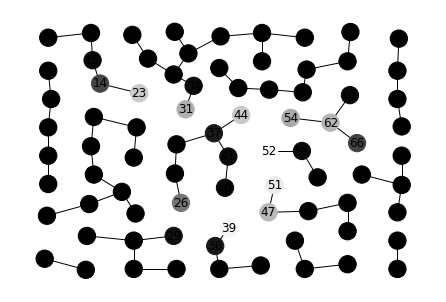

In [7]:
pos = features[:, 2:4]
g = Data(x=torch.from_numpy(features).to(torch.float), edge_index=torch.from_numpy(edge_index).to(torch.long), pos=torch.from_numpy(pos).to(torch.float), y=y)
nx_g = to_networkx(g, to_undirected=True)
nx_color = features[:,0]
nx_pos = dict(zip(range(g.num_nodes), pos))
nx.draw(nx_g, pos=nx_pos, node_color=nx_color, cmap="gray", with_labels=True)

Required pre-processing for RGB images

In [9]:
ds = datasets.CIFAR10(root="cifar10/test", train=False, download=True, transform=T.ToTensor())

Files already downloaded and verified


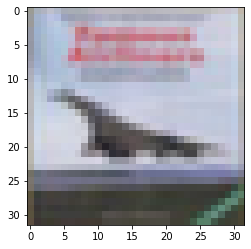

In [10]:
img = ds[3][0]
img_np = torch.stack([img[0], img[1], img[2]], dim=2).numpy()
plt.imshow(img_np)
n_segments = 75
compactness = 0.01
features, edge_index, s = color_features(img_np, n_segments, 0, 0)

Segmentation result

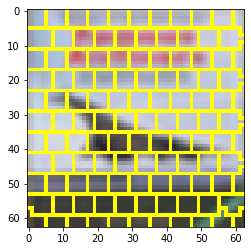

In [11]:

plt.imshow(ski.segmentation.mark_boundaries(img_np, s, mode='subpixel'))

Graph

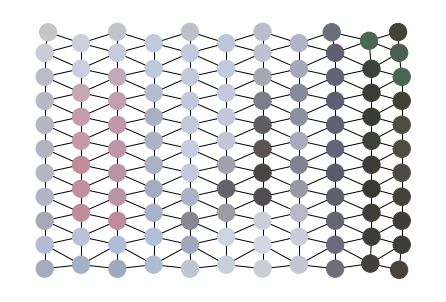

In [12]:

pos = features[:, 6:8]
g = Data(x=torch.from_numpy(features).to(torch.float), edge_index=torch.from_numpy(edge_index).to(torch.long), pos=torch.from_numpy(pos).to(torch.float), y=y)

nx_g = to_networkx(g, to_undirected=True)
nx_color = features[:,0:3]
nx_pos = dict(zip(range(g.num_nodes), pos))
nx.draw(nx_g, pos=nx_pos, node_color=nx_color)